# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [2]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [3]:
# your code(s)
data=pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


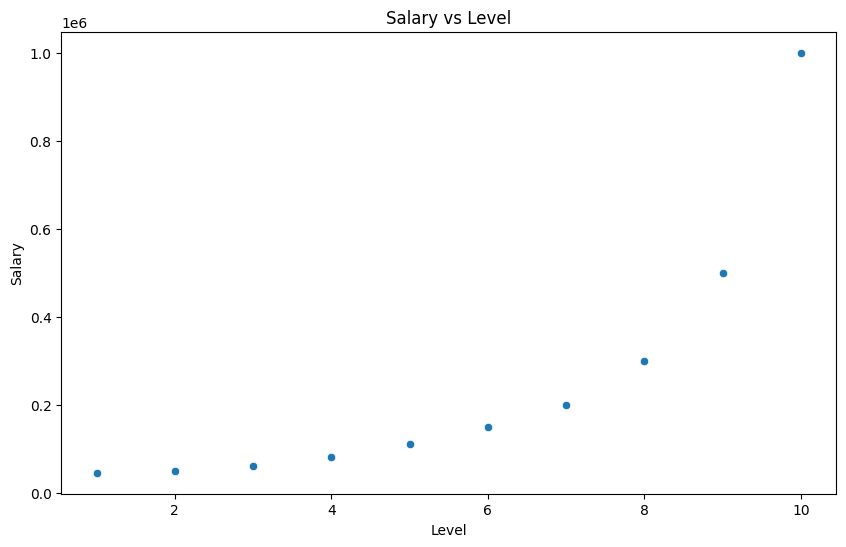

In [4]:
print(data.describe())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Level', y='Salary', data=data)
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * donot show a linear relationship

## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= \frac{1}{n}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b))}^2$$

Predicted Salary for level 7.5: $328672.35


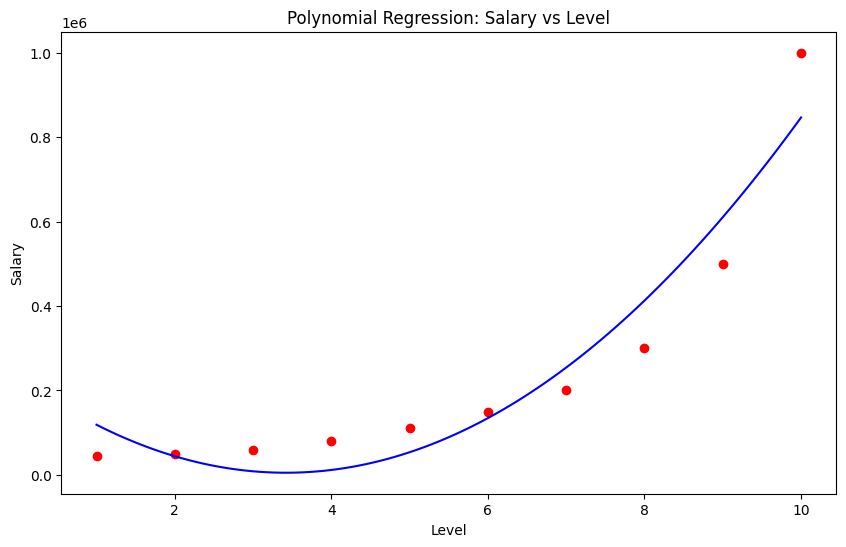

In [5]:
# your code to plot the cost function (if required)
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values
X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new = 7.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red')
plt.plot(np.linspace(min(X), max(X), 100), poly_model(np.linspace(min(X), max(X), 100)), color='blue')
plt.title('Polynomial Regression: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * The MSE measures the average squared difference between the predicted values and the true values in a regression problem.

**Derivatives of cost function:**
>* Derivative w.r.t. $w_1$
$$\frac{∂MSE}{∂w_1}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}^2$$
>* Derivative w.r.t. $w_2$
$$\frac{∂MSE}{∂w_2}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}$$
>* Derivative w.r.t. $b$
$$\frac{∂MSE}{∂b}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})$$
**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$${\Delta w_1}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}^2$$
$${\Delta w_2}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})x_{1i}$$
$${\Delta b}= -\frac{2}{N}{\Sigma_{i=1}^{n}(y_i-(w_1x_{1i}^{2}+w_2x_{1i}+b)})$$

## Implementation of the model

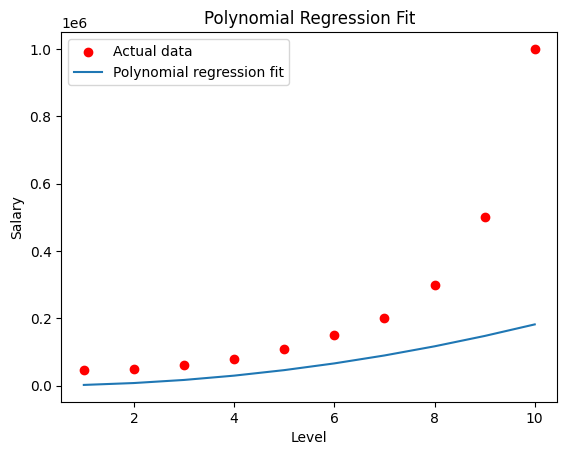

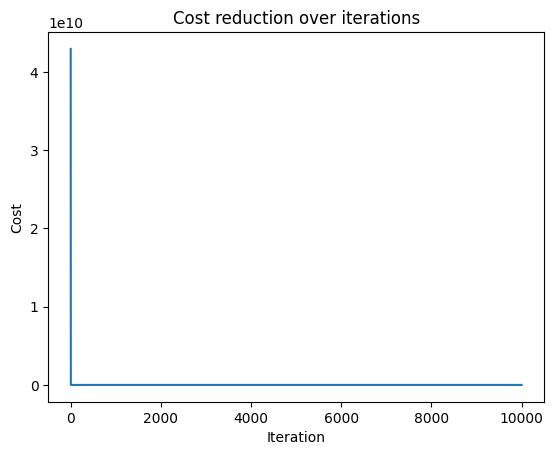

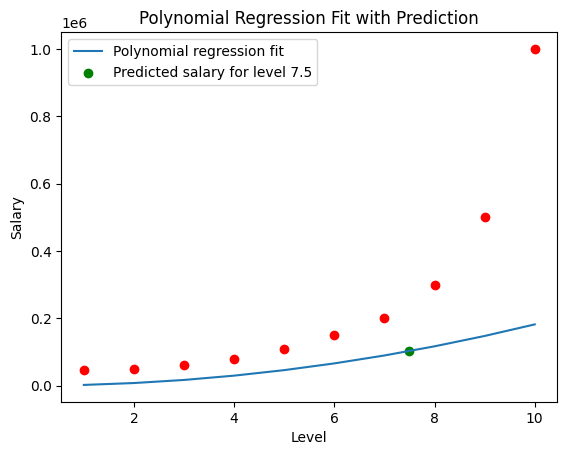

Predicted Salary for level 7.5: $102,644.26


In [7]:
# Write a code/ function to do the following

# function for your model

def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
        return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)
# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

### Answer the following

* What is learning rate?
> * The learning rate is a hyperparameter that controls the size of the steps taken during the gradient descent optimization process.
* What will happen if the learning rate is too large?
> * If the learning rate is too large, the optimization algorithm might overshoot the minimum point of the cost function and fail to converge.
* What will happen if the learning rate is too small?
> * the optimization process will be slow as it takes many iterations to reach the minimum point
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Modify the model equation in the second_order_model function to include a third-order term
> * Update the compute_gradients function to calculate derivatives with respect to the new parameter
> * Modify the initialization and updating of parameters in the gradient_descent function to include the new parameter
> * Adjust the input data to include appropriate features for the third-order model
> * Ensure that the visualizations are updated accordingly to accommodate the changes in the model